>0 f([0.1966251]) = 0.03866
>1 f([0.1926926]) = 0.03713
>2 f([0.18883874]) = 0.03566
>3 f([0.18506197]) = 0.03425
>4 f([0.18136073]) = 0.03289
>5 f([0.17773352]) = 0.03159
>6 f([0.17417885]) = 0.03034
>7 f([0.17069527]) = 0.02914
>8 f([0.16728136]) = 0.02798
>9 f([0.16393574]) = 0.02687
>10 f([0.16065702]) = 0.02581
>11 f([0.15744388]) = 0.02479
>12 f([0.154295]) = 0.02381
>13 f([0.1512091]) = 0.02286
>14 f([0.14818492]) = 0.02196
>15 f([0.14522122]) = 0.02109
>16 f([0.1423168]) = 0.02025
>17 f([0.13947046]) = 0.01945
>18 f([0.13668105]) = 0.01868
>19 f([0.13394743]) = 0.01794
>20 f([0.13126848]) = 0.01723
>21 f([0.12864311]) = 0.01655
>22 f([0.12607025]) = 0.01589
>23 f([0.12354885]) = 0.01526
>24 f([0.12107787]) = 0.01466
>25 f([0.11865631]) = 0.01408
>26 f([0.11628319]) = 0.01352
>27 f([0.11395752]) = 0.01299
>28 f([0.11167837]) = 0.01247
>29 f([0.1094448]) = 0.01198
>30 f([0.10725591]) = 0.01150
>31 f([0.10511079]) = 0.01105
>32 f([0.10300857]) = 0.01061
>33 f([0.1009484]) = 0.0101

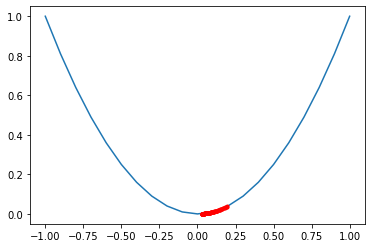

In [4]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	  # Calculate the derivative of the provided objective function
      h = 1e-6  # A small number for numerical differentiation
      return (objective(x + h) - objective(x - h)) / (2*h)

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 100
# define the step size
step_size = 0.01
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

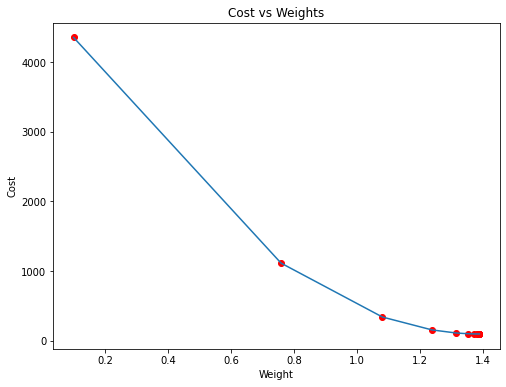

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


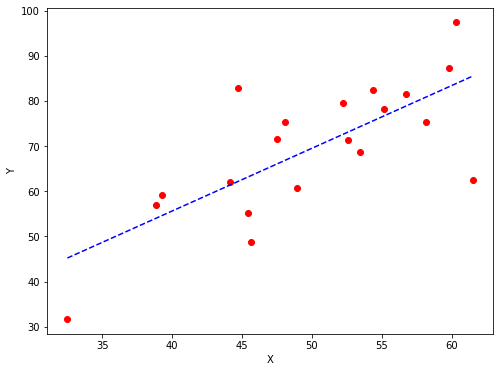

In [5]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
	
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters 
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to 
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
	
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias


def main():
	
	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
		60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()

	
if __name__=="__main__":
	main()
